In [99]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/tmp/ipykernel_7968/1041966425.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [100]:

def generate(m):

    X=np.random.randn(m)*10
    noise=np.random.randn(m)*5

    y=3*X+1+noise
    return X,y




In [101]:
X,y=generate(100)
X.mean()

-0.10329789077645427

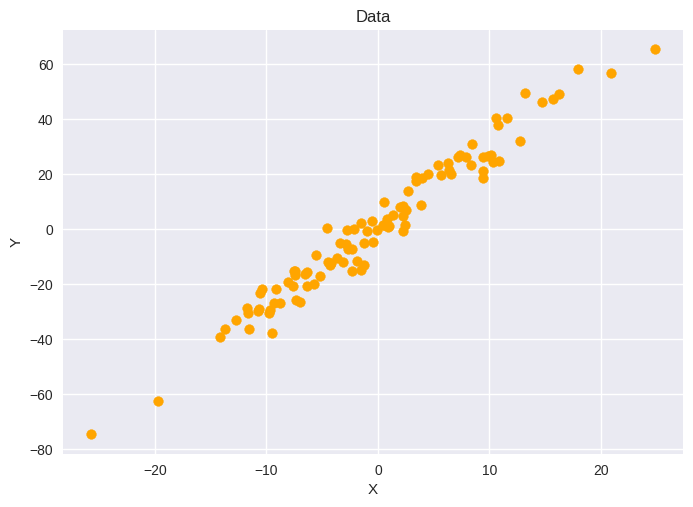

In [102]:
def plot(X,y,color='orange',title='Data'):
    plt.scatter(X,y,color=color)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
plot(X,y)

In [134]:
X.m

AttributeError: 'numpy.ndarray' object has no attribute 'm'

In [147]:
def normalise(X):
    X=(X-X.mean())/X.std()
    return X
X=normalise(X)
X.mean()



3.3306690738754695e-18

In [148]:
X.std()

1.0

In [149]:
def TrainTestsplit(X,y,split=0.8):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    split=int(split*m)
    XT=data[:split,0]
    yT=data[:split,1]
    Xt=data[split:,0]
    yt=data[split:,1]
    return XT,yT,Xt,yt
XT,yT,Xt,yt=TrainTestsplit(X,y)
    

In [150]:
XT

array([ 1.24090532,  0.95110171,  1.17395137,  0.51643743, -1.31712605,
       -1.07687166, -0.29849616, -0.04327437, -0.3136169 ,  0.0687328 ,
        1.07754642,  1.15624123, -0.61934756,  1.78206223, -1.18528003,
        0.26202056, -0.34251874, -1.08567037, -0.12931854,  0.96142873,
       -0.04033454, -0.20341996,  1.12435795, -0.49831706, -0.81476292,
       -1.04000381, -0.22692828,  0.45811599,  0.82070362, -0.56960651,
        2.04136004,  1.22940065, -0.70130745, -2.88896488, -0.3732971 ,
        0.73088987,  0.23608825,  0.16390527,  0.28171274,  0.7499183 ,
        1.21139426, -1.41983444, -0.2511664 , -1.16069134, -0.83868033,
        0.89933051, -0.90031777,  2.36811228,  0.45117187,  0.06231918,
       -0.24918969, -0.09684173, -0.77298592, -0.40677376,  0.31640922,
        0.65255208,  0.26148893,  0.72574874, -1.5333378 , -0.16152919,
       -1.58836281, -0.98322222, -0.47336779,  1.50191491, -0.72613424,
       -1.30413092,  0.07772639,  0.26830243, -0.84357809, -0.63

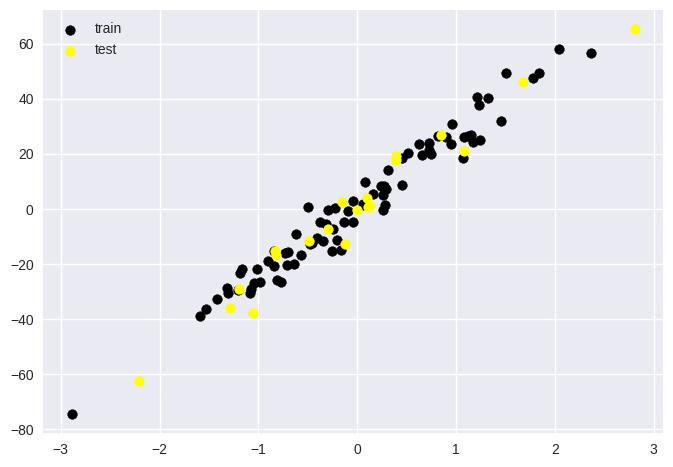

In [151]:
plt.scatter(XT,yT,color="black",label="train")
plt.scatter(Xt,yt,color="yellow",label="test")
plt.legend()
plt.show()

In [156]:
def hypothesis(X,theta):
    return theta[0]+theta[1]*X
    
def error(X,y,theta):
    m=X.shape[0]
    e=0
    
    for i in range(m):
        y_i=hypothesis(X[i],theta)
        e=e+(y_i-y[i])**2
    return e/(2*m)

def gradient(X,y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        exp=hypothesis(X[i],theta)-y[i]
        grad[0]+=exp
        grad[1]+=exp*X[i]
    return grad/m
    
        
        
    
def train(X,y,learning_rate=0.1):
    theta=np.zeros((2,))
    m=100
    
    error_list=[]
    for i in range(m):
        grad=gradient(X,y,theta)
        
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        error_list.append(error(X,y,theta))
    plt.xlabel("no of iterations")
    plt.ylabel("error")
    
       
    plt.plot(error_list)
    plt.show()  
    return theta


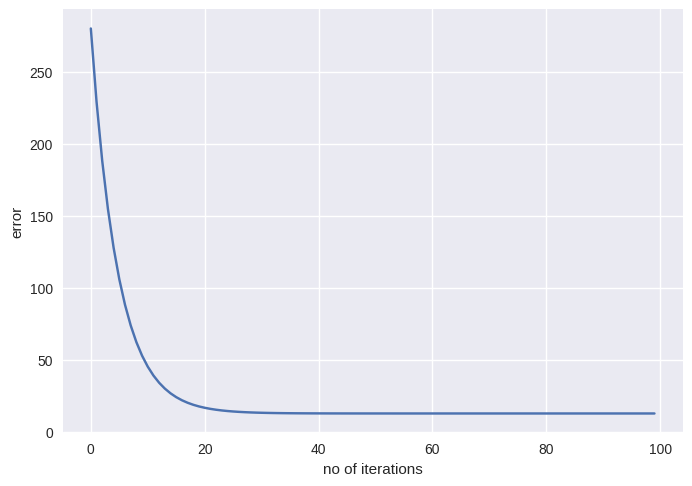

In [157]:
theta = train(X,y)


In [162]:
def predict(X,theta):
    return hypothesis(X,theta)


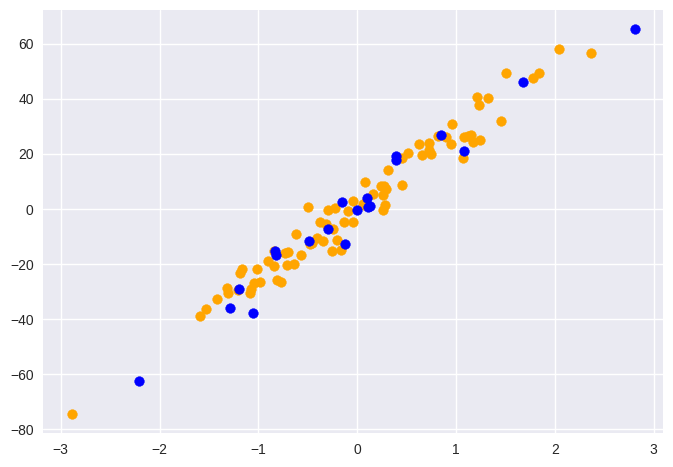

In [163]:
plt.scatter(XT,yT,color="orange")
plt.scatter(Xt,yt,color="blue")
plt.show()

In [171]:
yp=predict(Xt,theta)

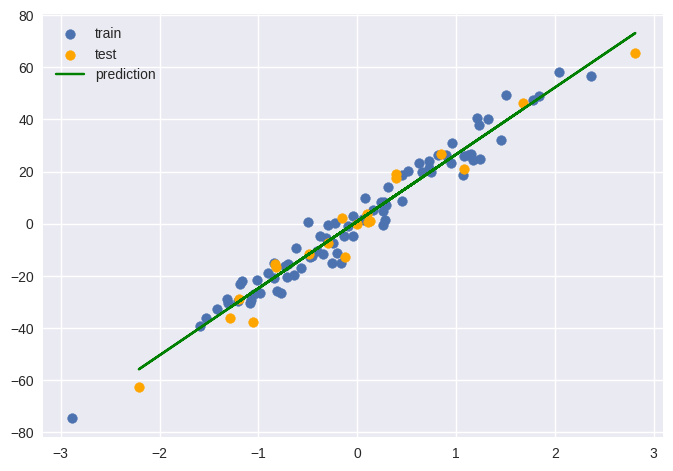

In [172]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()

In [175]:
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    den=np.sum((y-ymean)**2)
    return 1-(num/den)
r2score(yt,yp)

0.9610305277448671